In [136]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [137]:
import pandas as pd
class StringConverter(dict):

    def __contains__(self, item):

        return True

    def __getitem__(self, item):

        return str

    def get(self, default=None):

        return str

def load_data(data_path = "/Users/vishali/Desktop/SPRING 2021/project-ml"):
    csv_path = os.path.join(data_path, "cleandata.csv")
    return pd.read_csv(csv_path, low_memory = False)

In [138]:
new = load_data()

In [1]:
# new.info()

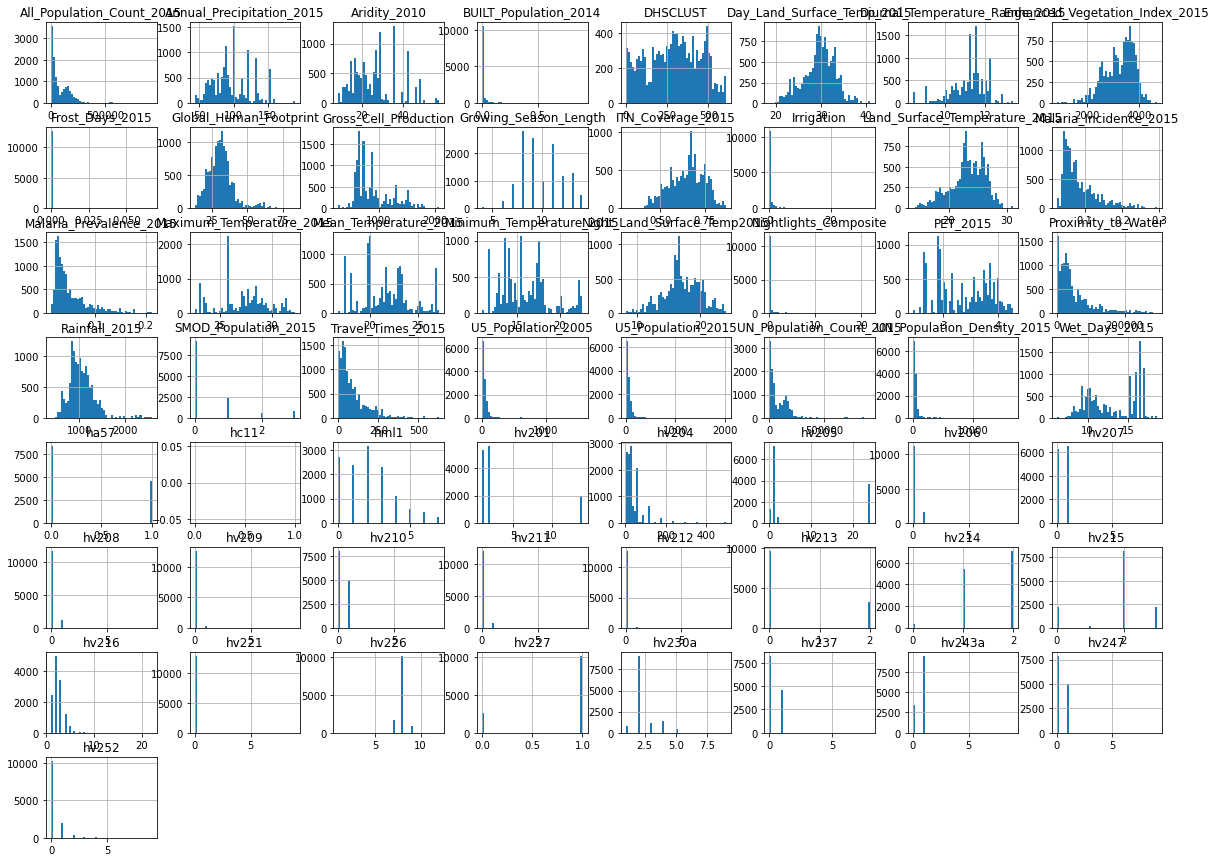

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
new.hist(bins=50, figsize=(20,15))
plt.show()

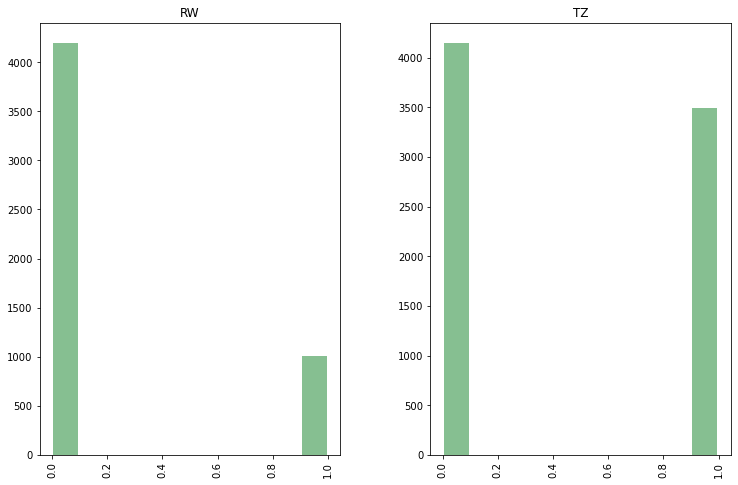

In [38]:
# distribution of anaemia
ax = new.hist(column='ha57', by = "DHSCC", grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [58]:
new = new.dropna(subset=['ha57'])

In [59]:
new['ha57'] = pd.Categorical(new.ha57)

In [60]:
y = new['ha57']

In [61]:
y.describe()

count     12841.0
unique        2.0
top           0.0
freq       8339.0
Name: ha57, dtype: float64

In [62]:
X = new.drop(['ha57', 'hc11','DHSCC', 'DHSCLUST'], axis = 1)

In [63]:
X.describe()

,hv201,hv204,hv205,hv206,hv207,hv208,hv209,hv210,hv211,hv212,...,PET_2015,Proximity_to_Water,Rainfall_2015,SMOD_Population_2015,Travel_Times_2015,U5_Population_2005,U5_Population_2015,UN_Population_Count_2015,UN_Population_Density_2015,Wet_Days_2015
count,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,...,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000
mean,3.397633,42.178179,7.572463,0.127716,0.509306,0.092205,0.023285,0.377385,0.064948,0.010825,...,3.361567,52225.143015,1047.216903,0.452068,89.548603,62.916138,82.794206,89004.760834,598.809143,13.004483
std,4.492480,51.092237,10.456671,0.365846,0.505510,0.325790,0.198914,0.490501,0.257570,0.127733,...,0.478913,55978.808795,287.723975,0.833991,88.575005,147.297777,192.186932,106834.032449,1315.795345,3.049468
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.450000,0.000000,373.818182,0.000000,0.000000,0.279527,0.382598,47.931122,0.151325,6.175833
25%,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.958333,15864.897360,860.400000,0.000000,29.733333,8.975997,12.279464,18009.960938,90.190898,10.200833
50%,2.000000,30.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.350000,32533.588980,1008.400000,0.000000,61.078591,29.028429,38.236400,49095.031250,291.320443,12.447499
75%,2.000000,60.000000,24.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,3.791667,67410.777170,1184.100000,1.000000,120.142857,60.846472,78.429549,143249.562500,547.835074,15.912499
max,14.000000,500.000000,24.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,4.283333,295739.776600,2589.000000,3.000000,628.839142,1574.178850,2028.777204,913433.375000,16723.025670,18.550833


In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12841 entries, 2 to 83561
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hv201                           12841 non-null  float64
 1   hv204                           12841 non-null  float64
 2   hv205                           12841 non-null  float64
 3   hv206                           12841 non-null  float64
 4   hv207                           12841 non-null  float64
 5   hv208                           12841 non-null  float64
 6   hv209                           12841 non-null  float64
 7   hv210                           12841 non-null  float64
 8   hv211                           12841 non-null  float64
 9   hv212                           12841 non-null  float64
 10  hv213                           12841 non-null  float64
 11  hv214                           12841 non-null  float64
 12  hv215                           

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( solver = 'liblinear', random_state = 42)
lr.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [68]:
y_pred_LR = lr.predict(X_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# True Negative Rate | Specificity

TNR = TN / (TN + FP)
print(TNR)

# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

from sklearn.metrics import precision_score
precision_score(y_test, y_pred_LR, average=None, zero_division=1)

[[1585   99]
 [ 776  109]]
              precision    recall  f1-score   support

         0.0       0.67      0.94      0.78      1684
         1.0       0.52      0.12      0.20       885

    accuracy                           0.66      2569
   macro avg       0.60      0.53      0.49      2569
weighted avg       0.62      0.66      0.58      2569

0.9412114014251781


array([0.67132571, 0.52403846])

In [70]:
# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_LR)

0.659400544959128

In [71]:
# define models and parameters
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [22]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.651948 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.651170 (0.009515) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.651948 (0.007956) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.650598 (0.009429) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.651040 (0.009912) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.651507 (0.009342) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [72]:
# best c is 1.0. runnning with that value. 
from sklearn.linear_model import LogisticRegression
lr_2 = LogisticRegression(C = 1.0, solver = 'liblinear', random_state = 42)
lr_2.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [77]:
# compare this to validation

y_pred_val = lr_2.predict(X_val)

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# True Negative Rate | Specificity

TNR = TN / (TN + FP)
print(TNR)

# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

from sklearn.metrics import precision_score
precision_score(y_val, y_pred_val, average=None, zero_division=1)

[[1184  467]
 [ 377  540]]
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      1651
         1.0       0.54      0.59      0.56       917

    accuracy                           0.67      2568
   macro avg       0.65      0.65      0.65      2568
weighted avg       0.68      0.67      0.67      2568

0.7171411265899454


array([0.75848815, 0.53624628])

In [79]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [81]:
y_pred_DT = classifier.predict(X_test)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred_DT)
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# True Negative Rate | Specificity

TNR = TN / (TN + FP)
print(TNR)


# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_DT)


# ROC curve 

from sklearn.metrics import roc_curve
from sklearn.metrics import auc



[[1192  492]
 [ 492  393]]
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71      1684
         1.0       0.44      0.44      0.44       885

    accuracy                           0.62      2569
   macro avg       0.58      0.58      0.58      2569
weighted avg       0.62      0.62      0.62      2569

0.7078384798099763


In [57]:
# Grid search for Decision Trees
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import random
from random import randint

In [84]:
max_depth_range = range(1,10)
min_samples_leaf_range = range(1,10)
parameters = {'criterion': ['gini'], 'max_depth': max_depth_range, 'min_samples_leaf': min_samples_leaf_range}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4, cv= 5)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.5652142305392961 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}


In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 1, random_state = 42)
classifier2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [91]:
y_pred_val = classifier2.predict(X_val)

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# True Negative Rate | Specificity

TNR = TN / (TN + FP)
print(TNR)

# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

from sklearn.metrics import precision_score
precision_score(y_val, y_pred_val, average=None, zero_division=1)

[[1184  467]
 [ 377  540]]
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      1651
         1.0       0.54      0.59      0.56       917

    accuracy                           0.67      2568
   macro avg       0.65      0.65      0.65      2568
weighted avg       0.68      0.67      0.67      2568

0.7171411265899454


array([0.75848815, 0.53624628])

In [ ]:
# now the SVM classifier. 

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(max_iter=100000,random_state=42)
lin_svc.fit(X_train_scaled, y_train)
y_pred = lin_svc.predict(X_test_scaled)

In [114]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# True Negative Rate | Specificity

TNR = TN / (TN + FP)
print(TNR)


# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


# ROC curve 

from sklearn.metrics import roc_curve
from sklearn.metrics import auc


[[1412  272]
 [ 554  331]]
              precision    recall  f1-score   support

         0.0       0.72      0.84      0.77      1684
         1.0       0.55      0.37      0.44       885

    accuracy                           0.68      2569
   macro avg       0.63      0.61      0.61      2569
weighted avg       0.66      0.68      0.66      2569

0.838479809976247


In [115]:
# gridsearch SVM
# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.988667 using {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.988667 (0.008459) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.985333 (0.012037) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.969000 (0.017578) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.988667 (0.008459) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.985333 (0.012037) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.973000 (0.016763) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.986667 (0.009775) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.986333 (0.013536) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.983667 (0.013780) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.918667 (0.031170) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.987667 (0.010225) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.988000 (0.009452) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.918667 (0.031170) with: {'C': 0.01, 'gamma': 'scale',

In [119]:
from sklearn.svm import LinearSVC
lin_svc2 = LinearSVC(max_iter=100000,C = 50, kernel = 'poly', gamma = 'scale', random_state=42)
lin_svc2.fit(X_train_scaled, y_train)
y_pred = lin_svc2.predict(X_test_scaled)

TypeError: __init__() got an unexpected keyword argument 'kernel'

In [143]:
# dimensionality reduction

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_red = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


print("Full dimensionality: {}".format(X.shape[1]))
print("Reduced dimensionality: {}".format(X_red.shape[1]))



Full dimensionality: 100
Reduced dimensionality: 91


In [146]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [147]:
y_pred_LR = lr.predict(X_test)

In [148]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# True Negative Rate | Specificity

TNR = TN / (TN + FP)
print(TNR)

# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

from sklearn.metrics import precision_score
precision_score(y_test, y_pred_LR, average=None, zero_division=1)

[[100   2]
 [  1  97]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.98      0.99      0.98        98

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200

0.9803921568627451


array([0.99009901, 0.97979798])

In [149]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [150]:
y_pred_DT = classifier.predict(X_test)

In [151]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred_DT)
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# True Negative Rate | Specificity

TNR = TN / (TN + FP)
print(TNR)


# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_DT)


# ROC curve 

from sklearn.metrics import roc_curve
from sklearn.metrics import auc



[[100   2]
 [  1  97]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.98      0.99      0.98        98

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200

0.9803921568627451


In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(max_iter=100000,random_state=42)
lin_svc.fit(X_train_scaled, y_train)
y_pred = lin_svc.predict(X_test_scaled)

In [155]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# True Negative Rate | Specificity

TNR = TN / (TN + FP)
print(TNR)


# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


# ROC curve 

from sklearn.metrics import roc_curve
from sklearn.metrics import auc


[[99  3]
 [ 3 95]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       102
           1       0.97      0.97      0.97        98

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

0.9705882352941176


In [ ]:
# finally Random forests.
